In [12]:
import matplotlib
import matplotlib.pyplot as plt
import cvxopt

# Question 1

In [13]:
# -*- coding: utf-8 -*-

import numpy as np

#%%
########################################################
######## X-MAC: Trade_off Energy with Delay using GT
########################################################
# Radio subsystem varaible definition

P     = 32.            # Payload [byte]
R     = 31.25          # CC2420 Radio Rate [kbyte/s = Byte/ms]
D     = 8              # number of levels
C     = 5              # neighbors size (connectivity)
N     = C*(D^2)         # number of nodes
#### BE CAREFUL:  Times are in milliseconds (ms)
Lmax  = 5000.          # Maximal allowed Delay (ms)
Emax  = 1.            # MAximal Energy Budjet (J)

L_pbl = 4.             # preamble length [byte]
L_hdr = 9. + L_pbl     # header length [byte]
L_ack = 9. + L_pbl     # ACK length [byte]
L_ps  = 5. + L_pbl     # preamble strobe length [byte]

Tal  = 0.95            # ack listen period [ms]
Thdr = L_hdr/R         # header transmission duration [ms]
Tack = L_ack/R         # ACK transmission duration [ms]
Tps  = L_ps/R          # preamble strobe transmission duration [ms]
Tcw  = 15*0.62         # Contention window size [ms]
Tcs  = 2.60            # Time [ms] to turn the radio into TX and probe the channel (carrier sense)
Tdata = Thdr + P/R + Tack # data packet transmission duration [ms]

### Sampling frequency
Fs   = 1.0/(60*30*1000)    # e.g. Min traffic rate 1 pkt/half_hour = 1/(60*30*1000) pk/ms

# Sleep period: Parameter Bounds
Tw_max  = 500.       # Maximum Duration of Tw in ms
Tw_min  = 100.       # Minimum Duration of Tw in ms




### 1-1 Finding the values of alpha1, alpha2 and alpha 3 for 1pckt/5min

We need to find the values of the frequencies

In [14]:
### Sampling frequency
Fs   = 1.0/(60*5*1000)    # e.g. Min traffic rate 1 pkt/ 5 min 

In [15]:
d=1 #to eliminate the max in the equation
Fout=Fs*(((D**2)-(d**2)+(2*d-1))/(2*d-1)) #Node’s Output Traffic Frequency at level d
Fi=Fs*((D^2)-(d^2))/(2*d-1) #Node’s Input Traffic Frequency at level d
I= (2*d+1)/(2*d-1)
Fb=(C-I)*Fout

In [16]:
alpha1= Tcs+Tal+1.5*Tps*(((Tps+Tal)/2)+Tack+Tdata)*Fb
alpha1

3.55053286912

In [17]:
alpha2=Fout/2
alpha2

0.00010666666666666667

In [18]:
a1=(0.5*(Tps+Tal)+Tcs+Tal+Tack+Tdata)*Fout
a2=((1.5*Tps+Tack+Tdata)*Fi)+(0.75*Tps*Fb)
alpha3=a1+a2
alpha3

0.0015293333333333335

### 1-2 Plotting Energy as a function of T for different pckt/min rates :

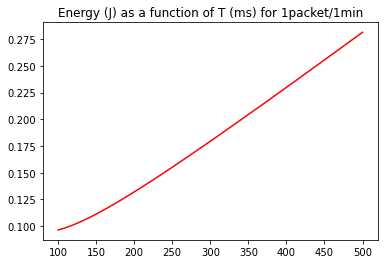

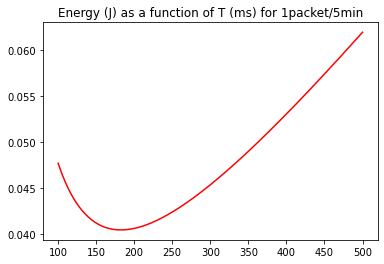

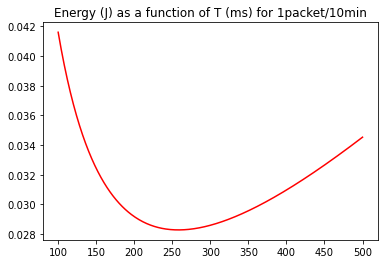

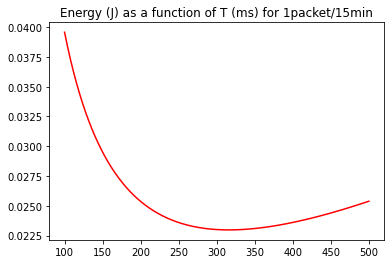

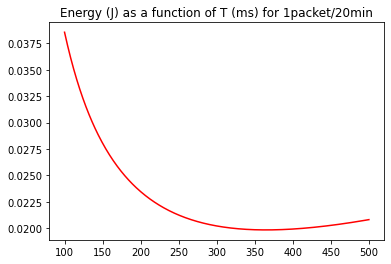

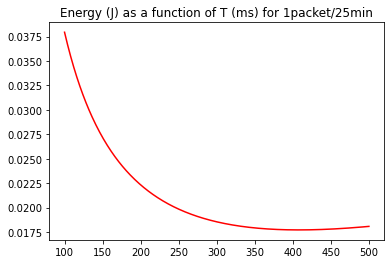

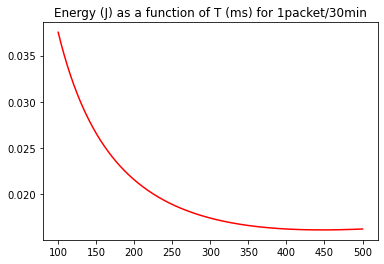

In [19]:
for x in [1,5,10,15,20,25,30]:    
    Fs   = 1.0/(60*x*1000)
    d=1 #to eliminate the max in the equation
    Fout=Fs*(((D**2)-(d**2)+(2*d-1))/(2*d-1)) #Node’s Output Traffic Frequency at level d
    Fi=Fs*((D^2)-(d^2))/(2*d-1) #Node’s Input Traffic Frequency at level d
    I= (2*d+1)/(2*d-1)
    Fb=(C-I)*Fout
    alpha1= Tcs+Tal+1.5*Tps*(((Tps+Tal)/2)+Tack+Tdata)*Fb
    alpha2=Fout/2
    alpha3=(0.5*(Tps+Tal)+Tcs+Tal+Tack+Tdata)*Fout+((1.5*Tps+Tack+Tdata)*Fi)+(0.75*Tps*Fb)


    # 400 linearly spaced numbers
    Tw = np.linspace(100,500,400)

    # The function that we want to plot
    E=(alpha1/Tw)+alpha2*Tw+alpha3

    # setting the axes at the centre
    fig = plt.figure()

    # plot the function
    plt.plot(Tw,E, 'r')

    plt.title("Energy (J) as a function of T (ms) for 1packet/"+str(x)+"min")

    # show the plot
    plt.show()

- We can see that for 1 pckt/1 min, there is nearly a linear relationship between E and Tw
- Energy doesn't grow as intensly as it was doing for big value of Tw when the packets are fewer, it even stagnates   and seems constant starting from 1pckt/30min for big values of Tw.
- The decay is in Energy is less brutal when the packets are less frequent for smaller values of Tw
- We can also notice that the shape of the plot is convex.


Everything thus seems logical as the lesser are the packets and the longer is the time Tw, less energy is consumed

### 1-3 Finding the values of beta1 and beta 2

In [20]:
d=D
beta1=0
for i in range (d):
    beta1+=0.5
beta2=0
for i in range(d):
    beta2+=(Tcw/2)+Tdata
beta1,beta2

(4.0, 52.048)

The values found are the same as those found by the professor

### 1-4 Plotting End to End Delay (ms) as a function of Tw (ms)

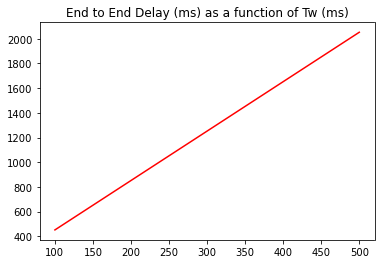

In [21]:
Tw = np.linspace(100,500,400)


L=beta1*Tw+beta2

# setting the axes at the centre
fig = plt.figure()

# plot the function
plt.plot(Tw,L, 'r')

plt.title("End to End Delay (ms) as a function of Tw (ms)")

# show the plot
plt.show()

As we expected, the delay is an affine function of Tw

### 1-5 Plotting the curve E-L for different pckt/min rates

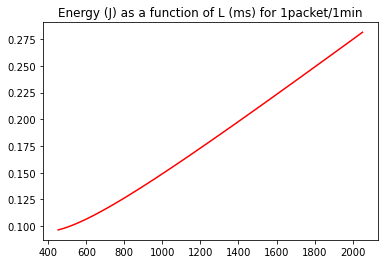

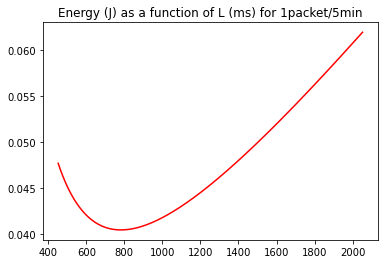

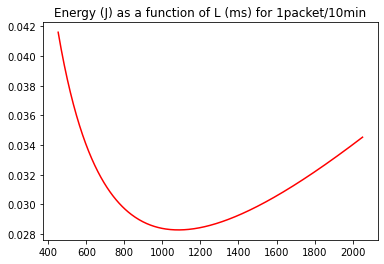

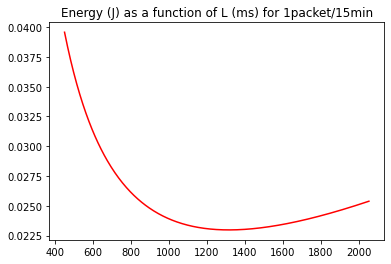

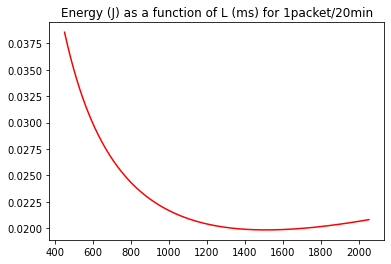

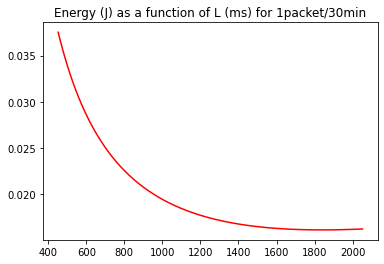

In [22]:
for x in [1,5,10,15,20,30]:
    Fs   = 1.0/(60*x*1000)
    d=1 #to eliminate the max in the equation
    Fout=Fs*(((D**2)-(d**2)+(2*d-1))/(2*d-1)) #Node’s Output Traffic Frequency at level d
    Fi=Fs*((D^2)-(d^2))/(2*d-1) #Node’s Input Traffic Frequency at level d
    I= (2*d+1)/(2*d-1)
    Fb=(C-I)*Fout
    alpha1= Tcs+Tal+1.5*Tps*(((Tps+Tal)/2)+Tack+Tdata)*Fb
    alpha2=Fout/2
    alpha3=(0.5*(Tps+Tal)+Tcs+Tal+Tack+Tdata)*Fout+((1.5*Tps+Tack+Tdata)*Fi)+(0.75*Tps*Fb)


    # 400 linearly spaced numbers
    L = np.linspace(beta1*100+beta2,beta1*500+beta2,400)

    # the function, which is y = x^2 here
    E=(alpha1*beta1/(L-beta2))+alpha2*(L-beta2)/beta1+alpha3

    # setting the axes at the centre
    fig = plt.figure()

    # plot the function
    plt.plot(L,E, 'r')

    plt.title("Energy (J) as a function of L (ms) for 1packet/"+str(x)+"min")

    # show the plot
    plt.show()

- We can see that for 1 pckt/1 min, there is neearly a linear relationship between E and L
- Energy doesn't grow as intensly as it was doing for big value of L when the packets are fewer, it even stagnates   and seems constant starting from 1pckt/30min for big values of L.
- The decay is in Energy is less brutal when the packets are less frequent for smaller values of L
- We can also notice that the shape of the plot is convex.


Everything thus seems logical as the lesser are the packets and the longer is the delay, less energy is consumed. We could have guessed these shapes as we already had the shapes of E-Tw and the relationship between Tw and L is affine.

# Question 2

### 2-1 Optimal energy for several values of L

In [23]:
from scipy import optimize

In [24]:
Tw=250
Ttx=0.5*Tw+Tack+Tdata
Etx=(Tcs+Tal+Ttx)*Fout


In [25]:
minimums=[]
dict={}
#for L_max in np.linspace(beta1*100+beta2,beta1*500+beta2,500):
for L_max in np.linspace(100,5000,100):  
    def E_min(x):
        return (alpha1/x)+alpha2*x+alpha3 #x=Tw
    def f_1(x):
        return beta1*x+beta2-L_max
    def f_2(x):
        return Tw_min-x
    def f_3(x):
        return C*Etx-0.25 #I0=C
    #cons = ({'type': 'ineq','fun' : f_1},{'type': 'ineq','fun' : f_2})
    cons = ({'type': 'ineq','fun' : f_1},{'type': 'ineq','fun' : f_2},{'type': 'ineq','fun' : f_3})
    x0=250
    minimal_value=(optimize.minimize (E_min,x0,constraints= cons).fun)
    dict[(L_max-beta2)/beta1]=minimal_value
    minimums.append(minimal_value)


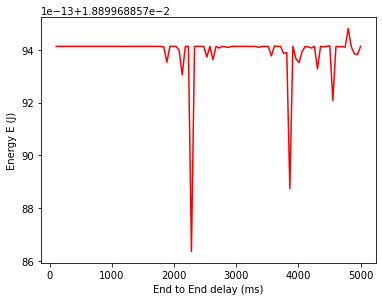

In [46]:
L_max = np.linspace(100,5000,100)

fig = plt.figure()
fig.subplots_adjust(top=2)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Energy E (J)')
ax1.set_xlabel('End to End delay (ms)')
plt.legend("")
plt.plot(L_max,minimums, 'r')

plt.show()



In [45]:
E_best=np.amin(minimums);E_best

0.01889968857863504

In [47]:
E_average=np.average(minimums);E_average

0.018899688579392105

- We can see that there are some minimal energy values (inferior by 7*10(-13)J than the average) attained for some   values of L_max, especially for L_max approximately equal to 2100
- This small magnitude of 10**(-13) is due to the fact that for 1pckt/30 min, energy is approximatively constant     for values of L>1000ms, as we saw in the plot of 2-1 
- The energy values of L>1000ms seem logical as we saw in 2-1 that the values of energy are approximatively equal   to 0.018 for Fs that realises 1pckt/30 min

### 2-2 Optimal values of L for several values of Ebduget

In [27]:
minimums_2=[]
dict_2={}
for E_budget in np.linspace(0.5,5,100):    
    def L_min(x):
        return beta1*x+beta2
    def f_1(x):
        return (alpha1/x)+alpha2*x+alpha3-E_budget
    def f_2(x):
        return Tw_min-x
    def f_3(x):
        return 5*Etx-0.25
    #cons = ({'type': 'ineq','fun' : f_1},{'type': 'ineq','fun' : f_2})
    cons = ({'type': 'ineq','fun' : f_1},{'type': 'ineq','fun' : f_2},{'type': 'ineq','fun' : f_3})
    x0=1000
    minimal_value=optimize.minimize (L_min,x0,constraints= cons).fun
    dict_2[E_budget]={minimal_value}
    minimums_2.append(minimal_value)

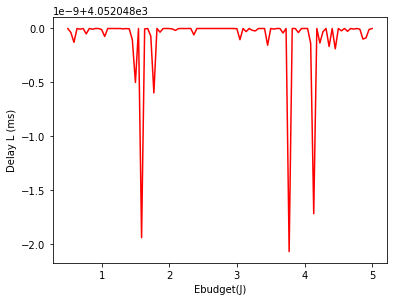

In [44]:
E_budget = np.linspace(0.5,5,100)
fig = plt.figure()
fig.subplots_adjust(top=2)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Delay L (ms)')
ax1.set_xlabel('Ebudget(J)')
plt.plot(E_budget,minimums_2, 'r')
plt.show()

In [36]:
L_best=np.amin(minimums_2);L_best

4052.0479999979316

In [37]:
L_average=np.average(minimums_2);L_average

4052.047999999912

- We can see that there are some minimal energy values attained for some values of Ebudget, especially for Ebudget   approximately equal to 1.6 and 3.8 where the value of L is approximately smaller by 2*(10**-9)ms than the         average 

In [211]:
import cvxpy as cp
from cvxpy import *

In [228]:
L_max=1200
from cvxopt import matrix, solvers
A = matrix([ [beta1, -1.0 , 0.0], [0, 0, 0] ])
b = matrix([ -beta2+L_max, -Tw_min, -5*Etx+0.25 ])
c = matrix([ alpha1, alpha2 ])
sol=solvers.lp(c,A,b)

ValueError: Rank(A) < p or Rank([G; A]) < n

## Question 3

In [31]:
E_worst=np.amax(minimums);E_worst

0.018899688579481086

In [32]:
L_worst=np.amax(minimums_2);L_worst

4052.048

We will formalize the optimization problem:

In [34]:
def f_0(x):
    return np.log(np.abs(E_worst-x[0]))+np.log(np.abs(L_worst-x[1]))
def f_1(x):    
    return (alpha1/x[2])+alpha2*x[2]+alpha3-E_worst
def f_2(x):
    return (alpha1/x[2])+alpha2*x[2]+alpha3-x[0]
def f_3(x):
    return beta1*x[2]+beta2-L_worst
def f_4(x):
    return beta1*x[2]+beta2-x[1]
def f_5(x):
    return Tw_min-x[2]
def f_6(x):
    return 0.25-5*Etx
#cons = ({'type': 'ineq','fun' : f_1},{'type': 'ineq','fun' : f_2})
cons = ({'type': 'ineq','fun' : f_1},{'type': 'ineq','fun' : f_2},{'type': 'ineq','fun' : f_3},{'type': 'ineq','fun' : f_4},{'type': 'ineq','fun' : f_5},{'type': 'ineq','fun' : f_6})
x0=[5,2000,300]
optimize.minimize (f_0,x0,constraints= cons)

     fun: 1.1094015331840739
     jac: array([-6.76679065e+02, -4.87327576e-04,  0.00000000e+00])
 message: 'Positive directional derivative for linesearch'
    nfev: 34
     nit: 10
    njev: 6
  status: 8
 success: False
       x: array([1.74218757e-02, 2.00000000e+03, 3.00000000e+02])

We consequently find this result for this opimization problem